"NETFLIX DATASET"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings(action="ignore")

READ NETFLIX FILE

In [2]:
df=pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


FIND SHAPE

In [3]:
df.shape

(8807, 12)

COLUMNS NAMES

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

RENAME COLUMN 

In [5]:
df.rename(columns={"listed_in":"genre"},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

DROP COLUMN

In [6]:
df.drop(columns="show_id",inplace=True)
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

CHECK DUPLICATE VALUES

In [69]:
df.duplicated().sum()

0

UNIQUE VALUES

In [8]:
df.nunique().sort_values(ascending=False)

title           8807
description     8775
cast            7692
director        4528
date_added      1767
country          748
genre            514
duration         220
release_year      74
rating            17
type               2
dtype: int64

In [9]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending= False)

missing_data = pd.concat([null,percent],axis=1,keys=["Missing Value Count","Percent"])

print("Total Records present: ",df.shape[0])
print(missing_data[missing_data["Missing Value Count"]!=0])
print("Total","                    ",missing_data["Missing Value Count"].sum(),"        ",round(100*(missing_data["Missing Value Count"].sum()/df.shape[0]),2))

Total Records present:  8807
            Missing Value Count  Percent
director                   2634    29.91
country                     831     9.44
cast                        825     9.37
date_added                   10     0.11
rating                        4     0.05
duration                      3     0.03
Total                      4307          48.9


In [10]:
df.dropna(subset=["date_added"],inplace=True)
df["date_added"].isna().sum()

0

In [11]:
df.dropna(subset=["rating"],inplace=True)
df["rating"].isna().sum()

0

In [12]:
df.dropna(subset=["duration"],inplace=True)
df["duration"].isna().sum()

0

In [13]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending= False)

missing_data = pd.concat([null,percent],axis=1,keys=["Missing Value Count","Percent"])

print("Total Records present: ",df.shape[0])
print(missing_data[missing_data["Missing Value Count"]!=0])
print("Total","                  ",missing_data["Missing Value Count"].sum(),"     ",round(100*(missing_data["Missing Value Count"].sum()/df.shape[0]),2))

Total Records present:  8790
          Missing Value Count  Percent
director                 2621    29.82
country                   829     9.43
cast                      825     9.39
Total                    4275       48.63


In [14]:
df["date_added"]=pd.to_datetime(df["date_added"],errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [15]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
genre                   object
description             object
dtype: object

In [17]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
df["day"]=df["date_added"].dt.day
df["month"]=df["date_added"].dt.month
df["year"]=df["date_added"].dt.year
df["month_name"]=df["date_added"].dt.month_name()
df["weekday"]=df["date_added"].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


In [19]:
df["rating"]=df["rating"].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'kids')
df["rating"]=df["rating"].replace(['PG-13','TV-14'],'Teens')
df["rating"]=df["rating"].replace(['R','TV-MA','NC-17'],'Adults')
df["rating"]=df["rating"].replace(['NR','UR'],np.NaN)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


In [20]:
df['rating'].unique()

array(['Teens', 'Adults', 'kids', nan], dtype=object)

In [21]:
df.dropna(subset=["rating"],inplace=True)
df["rating"].isna().sum()

0

In [22]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending= False)

missing_data = pd.concat([null,percent],axis=1,keys=["Missing Value Count","Percent"])

print("Total Records present: ",df.shape[0])
print(missing_data[missing_data["Missing Value Count"]!=0])
print("Total","                  ",missing_data["Missing Value Count"].sum(),"     ",round(100*(missing_data["Missing Value Count"].sum()/df.shape[0]),2))

Total Records present:  8708
            Missing Value Count  Percent
director                   2617    30.05
country                     829     9.52
cast                        808     9.28
date_added                   87     1.00
day                          87     1.00
month                        87     1.00
year                         87     1.00
month_name                   87     1.00
weekday                      87     1.00
Total                    4776       54.85


In [23]:
df[(df["director"].isna()) & (df["country"].isna()) & (df["cast"].isna())].shape[0]

96

In [24]:
df.shape

(8708, 16)

In [25]:
df.dropna(subset=['director','country','cast'],how='all',inplace=True)
df.shape

(8612, 16)

In [26]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_cast = df_cast.stack()
df_cast = pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast = df_cast[['title',0]]
df_cast.columns =['title','cast']
df_cast.replace('nan',np.NaN,inplace=True)
df_cast.isna().sum()

title      0
cast     712
dtype: int64

In [27]:
df_genre = pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre)
df_genre.reset_index(inplace=True)
df_genre = df_genre[['title',0]]
df_genre.columns =['title','genre']
df_genre.replace('nan',np.NaN,inplace=True)
df_genre.isna().sum()

title    0
genre    0
dtype: int64

In [28]:
df_director = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director = df_director[['title',0]]
df_director.columns =['title','director']
df_director.replace('nan',np.NaN,inplace=True)
df_director.isna().sum()

title          0
director    2521
dtype: int64

In [29]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country = df_country[['title',0]]
df_country.columns =['title','country']
df_country.replace('nan',np.NaN,inplace=True)
df_country.isna().sum()

title        0
country    733
dtype: int64

In [30]:
df12=df_cast.merge(df_genre,on='title')
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
147927,Zubaan,Anita Shabdish,International Movies
147928,Zubaan,Anita Shabdish,Music & Musicals
147929,Zubaan,Chittaranjan Tripathy,Dramas
147930,Zubaan,Chittaranjan Tripathy,International Movies


In [31]:
df123=df_director.merge(df12,on='title')
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
159583,Zubaan,Mozez Singh,Anita Shabdish,International Movies
159584,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
159585,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
159586,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [32]:
df1234=df_country.merge(df123,on='title')
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
199945,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
199946,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [33]:
df_new=df.merge(df1234,on='title')
df_new.head()

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [34]:
df_new.drop(columns = ['cast_x','country_x','director_x','genre_x'],inplace=True)
df_new.rename(columns={'country_y':'country','director_y':'director','cast_y':'cast','genre_y':'genre'},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [35]:
df_new['cast']=df_new['cast'].replace(np.NaN,'Unknown')
df_new['country']=df_new['country'].replace(np.NaN,'Unknown')
df_new['director']=df_new['director'].replace(np.NaN,'Unknown')

In [36]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [37]:
df_new.drop_duplicates(keep="first",inplace=True)

In [38]:
df_new.shape

(199895, 16)

In [39]:
df_movies=df_new.loc[df_new['type']=="Movie"]
df_tvs=df_new.loc[df_new['type']=="TV Show"]

In [40]:
df_movies.shape

(144240, 16)

In [41]:
df_tvs.shape

(55655, 16)

In [42]:
df_movies['duration'].unique

<bound method Series.unique of 0          90 min
157        91 min
158        91 min
159        91 min
160        91 min
           ...   
199945    111 min
199946    111 min
199947    111 min
199948    111 min
199949    111 min
Name: duration, Length: 144240, dtype: object>

In [43]:
df_movies['duration']=df_movies['duration'].str.replace('min',"")
df_movies.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [44]:
df_tvs['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [45]:
df_tvs['duration']=df_tvs['duration'].str.replace('Seasons',"")
df_tvs['duration']=df_tvs['duration'].str.replace('Season',"")
df_tvs.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [46]:
df_tvs.rename(columns={'duration' : 'seasons'},inplace=True)

In [47]:
print(df['year'].min())
print(df['year'].max())

2008.0
2021.0


In [48]:
df.groupby('type')['type'].count()

type
Movie      6031
TV Show    2581
Name: type, dtype: int64

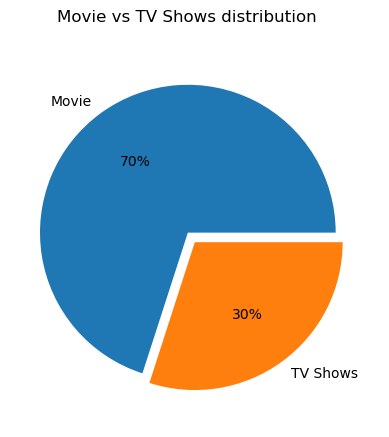

<Figure size 640x480 with 0 Axes>

In [49]:
labels=['Movie','TV Shows']
plt.pie(df.groupby('type')['type'].count(),labels=labels,explode=(0.08,0),autopct='%0.0f%%')
plt.suptitle("Movie vs TV Shows distribution")
plt.show()
plt.savefig("1.png")

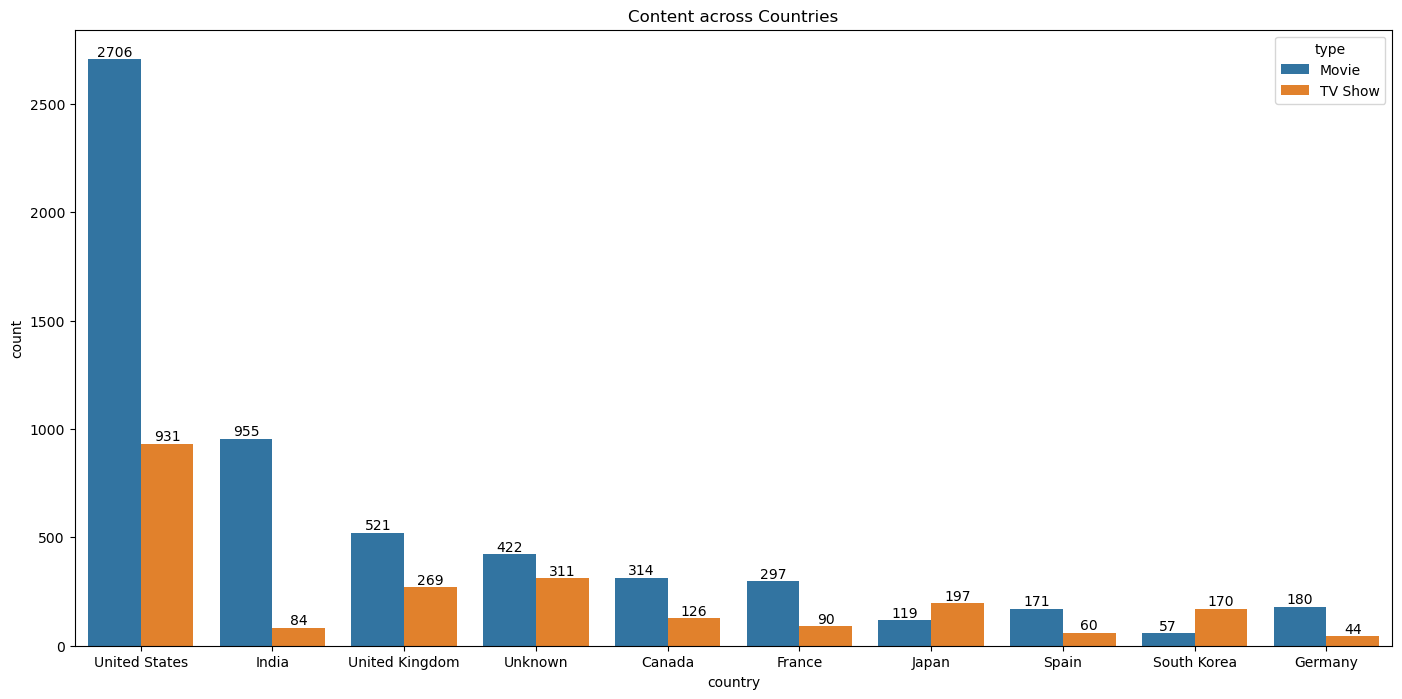

<Figure size 640x480 with 0 Axes>

In [50]:
df_temp=df_new.drop_duplicates(subset=['country','title'])

x=df_temp['country'].value_counts().head(10)

plt.figure(figsize=(17,8))
plt.title('Content across Countries')
label=sns.countplot(data=df_temp,x='country',hue='type',order=x.index)

for i in label.containers:
    label.bar_label(i)
plt.show()
plt.savefig("2.png")

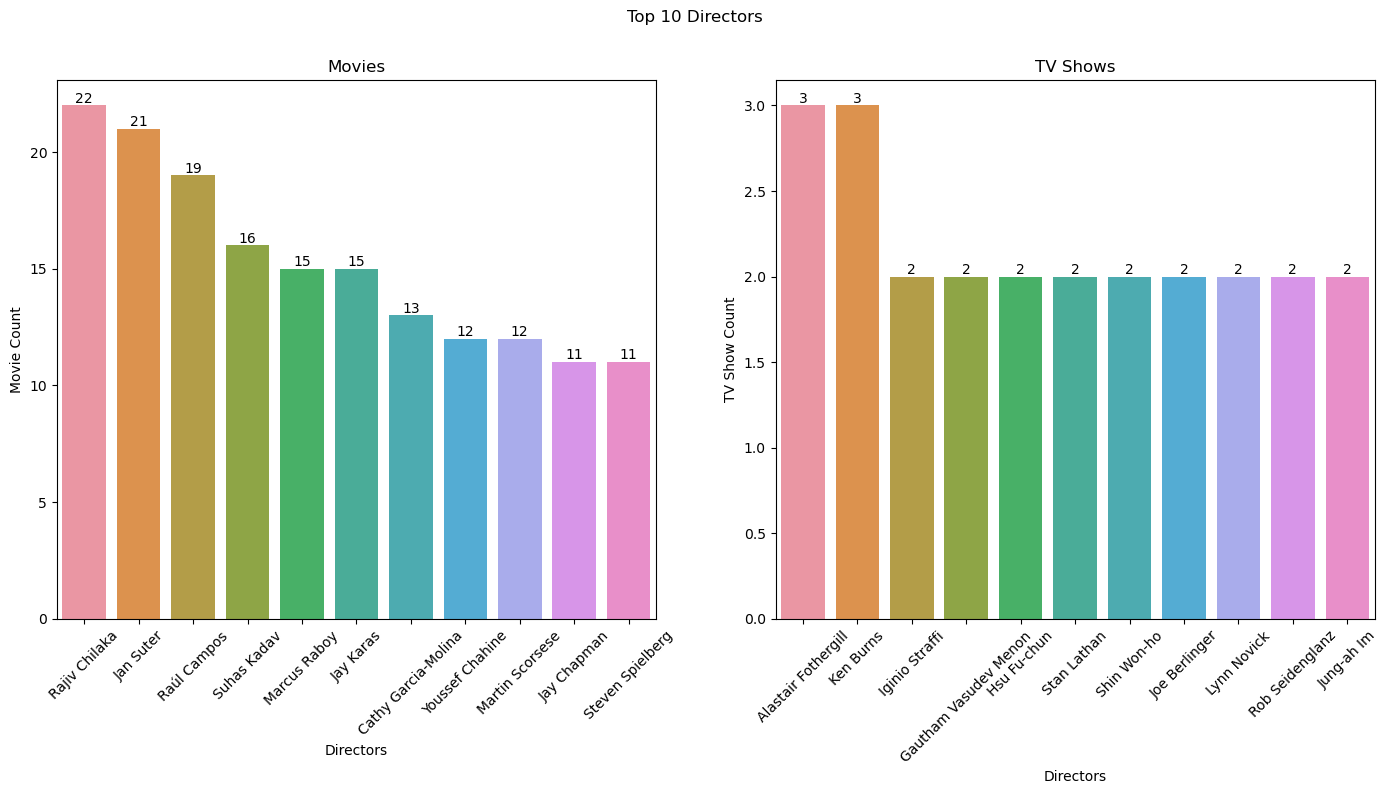

<Figure size 640x480 with 0 Axes>

In [51]:
df_movies_temp=df_movies.drop_duplicates(subset=['director','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['director','title'])

plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp, x='director', order=df_movies_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("Movie Count")


plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp, x='director', order=df_tvs_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("TV Show Count")

plt.show()
plt.savefig("3.png")

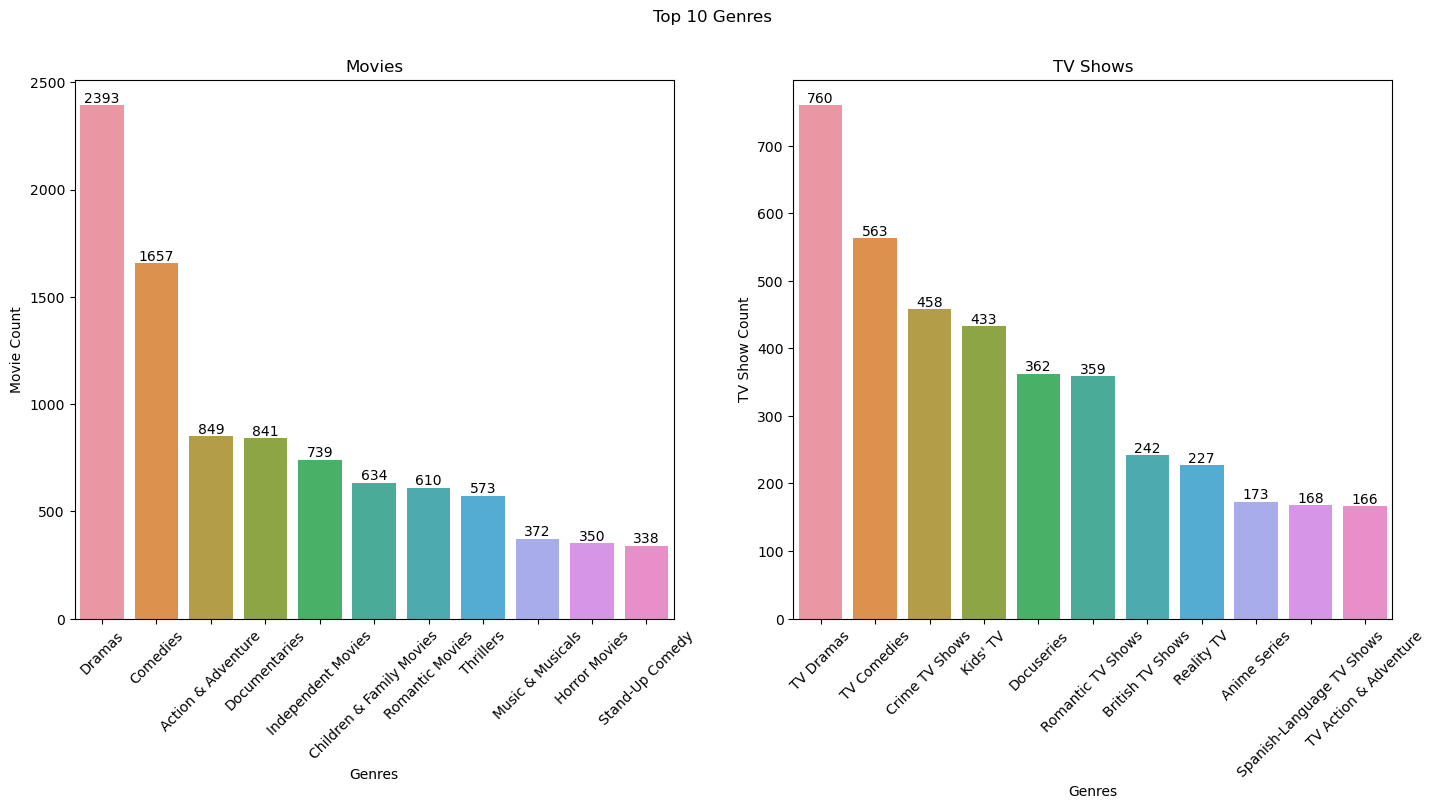

<Figure size 640x480 with 0 Axes>

In [52]:
df_movies_temp=df_movies.drop_duplicates(subset=['genre','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['genre','title'])

plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp, x='genre', order=df_movies_temp['genre'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Movie Count")


plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp, x='genre', order=df_tvs_temp['genre'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("TV Show Count")

plt.show()
plt.savefig("4.png")

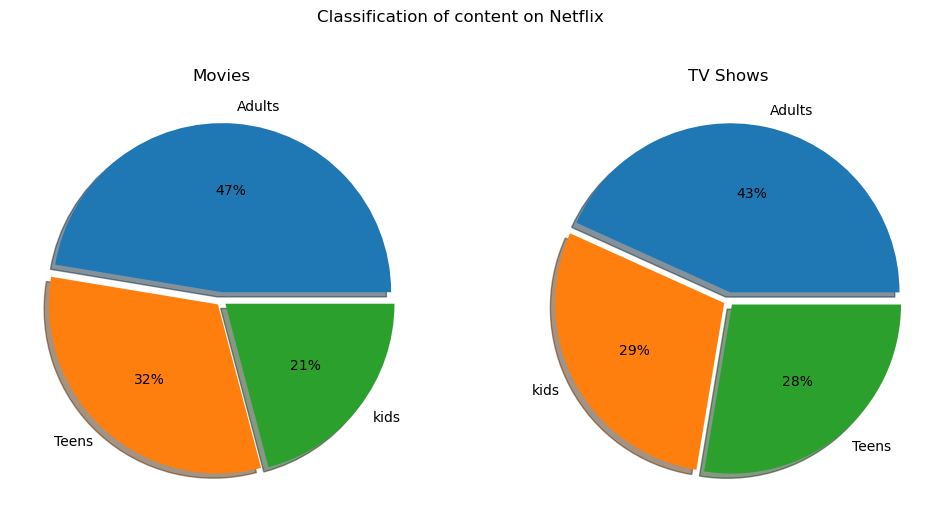

In [53]:
df_movies_temp=df_movies.drop_duplicates(subset=['rating','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['rating','title'])

plt.figure(figsize=(12,6))
plt.suptitle('Classification of content on Netflix')

plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(), labels=df_movies_temp['rating'].value_counts().index,autopct="%.0f%%",explode=(0.05,0.03,0.03),shadow=True)
plt.title("Movies")

plt.subplot(1,2,2)
plt.pie(df_tvs_temp['rating'].value_counts(), labels=df_tvs_temp['rating'].value_counts().index,autopct="%.0f%%",explode=(0.05,0.03,0.03),shadow=True)
plt.title("TV Shows")

plt.show()

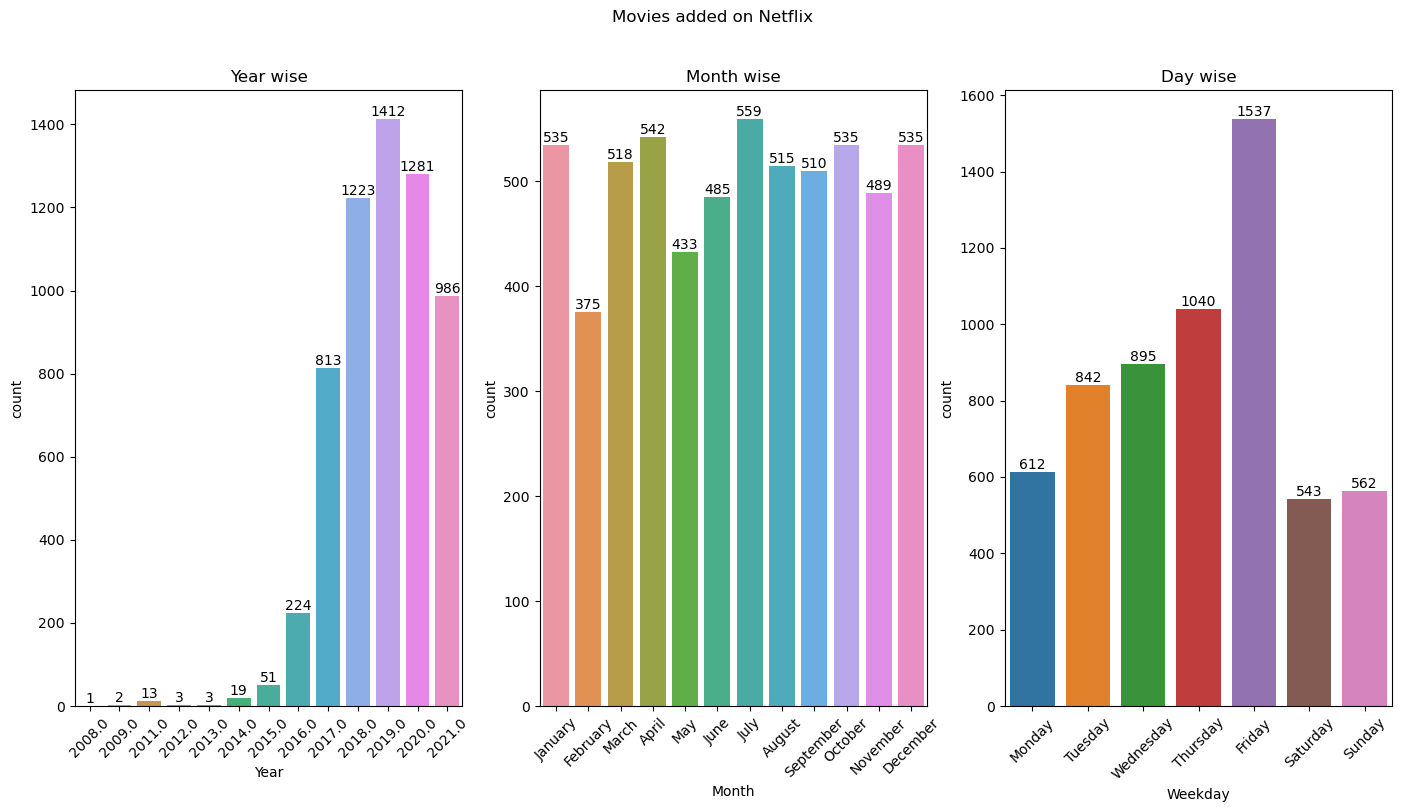

In [54]:
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])


mv_year = df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
mv_month = df_movies_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_movies_temp, x='year', order = mv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')


plt.subplot(1,3,2)
label = sns.countplot(data=df_movies_temp, x='month_name', order = mv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_movies_temp, x='weekday', order = mv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

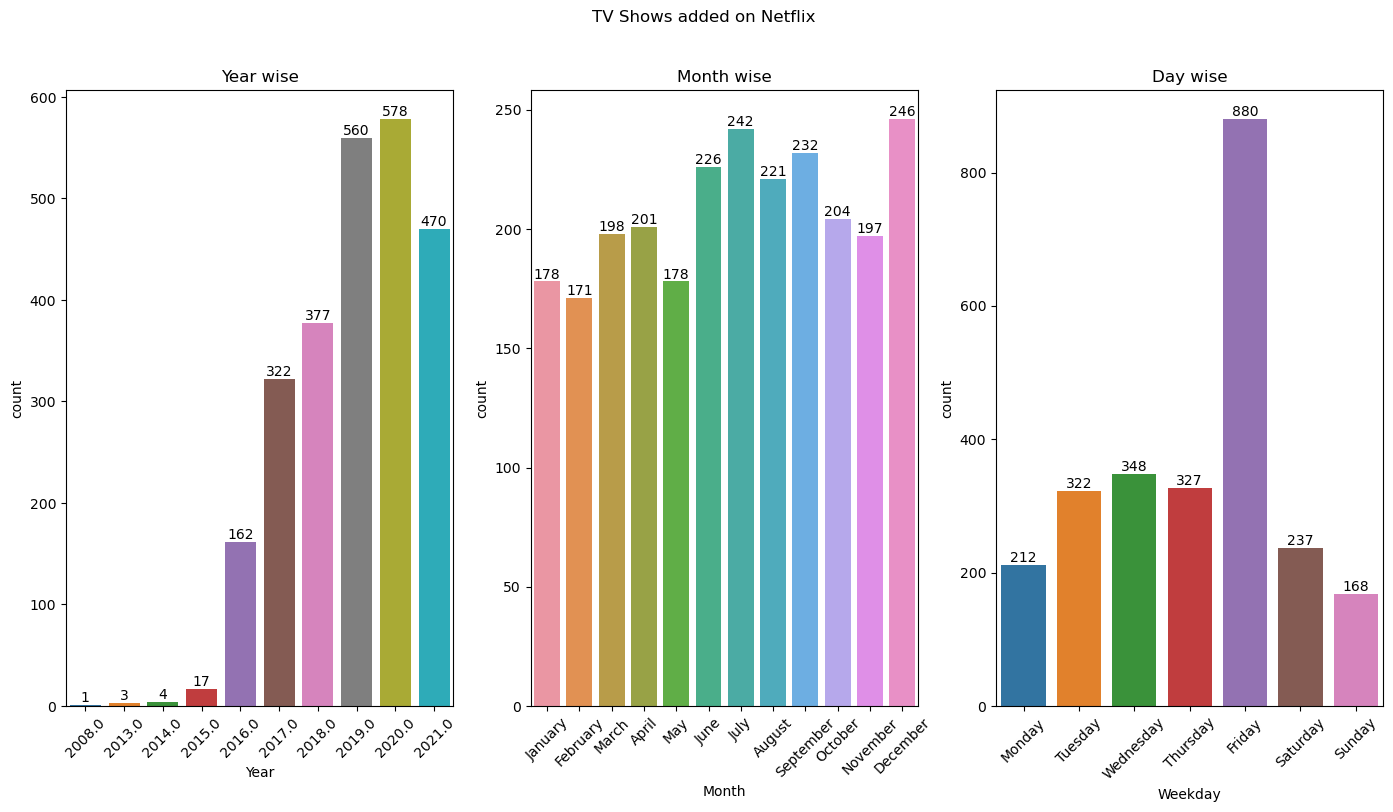

In [55]:
df_tvs_temp = df_tvs.drop_duplicates(subset = ['year','title'])

tv_year = df_tvs_temp['year'].value_counts()
tv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
tv_month = df_tvs_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tv_day = df_tvs_temp['weekday'].value_counts().loc[day_order]


plt.figure(figsize=(17,8))
plt.suptitle('TV Shows added on Netflix')


plt.subplot(1,3,1)
label = sns.countplot(data=df_tvs_temp, x='year', order = tv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_tvs_temp, x='month_name', order = tv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_tvs_temp, x='weekday', order= tv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

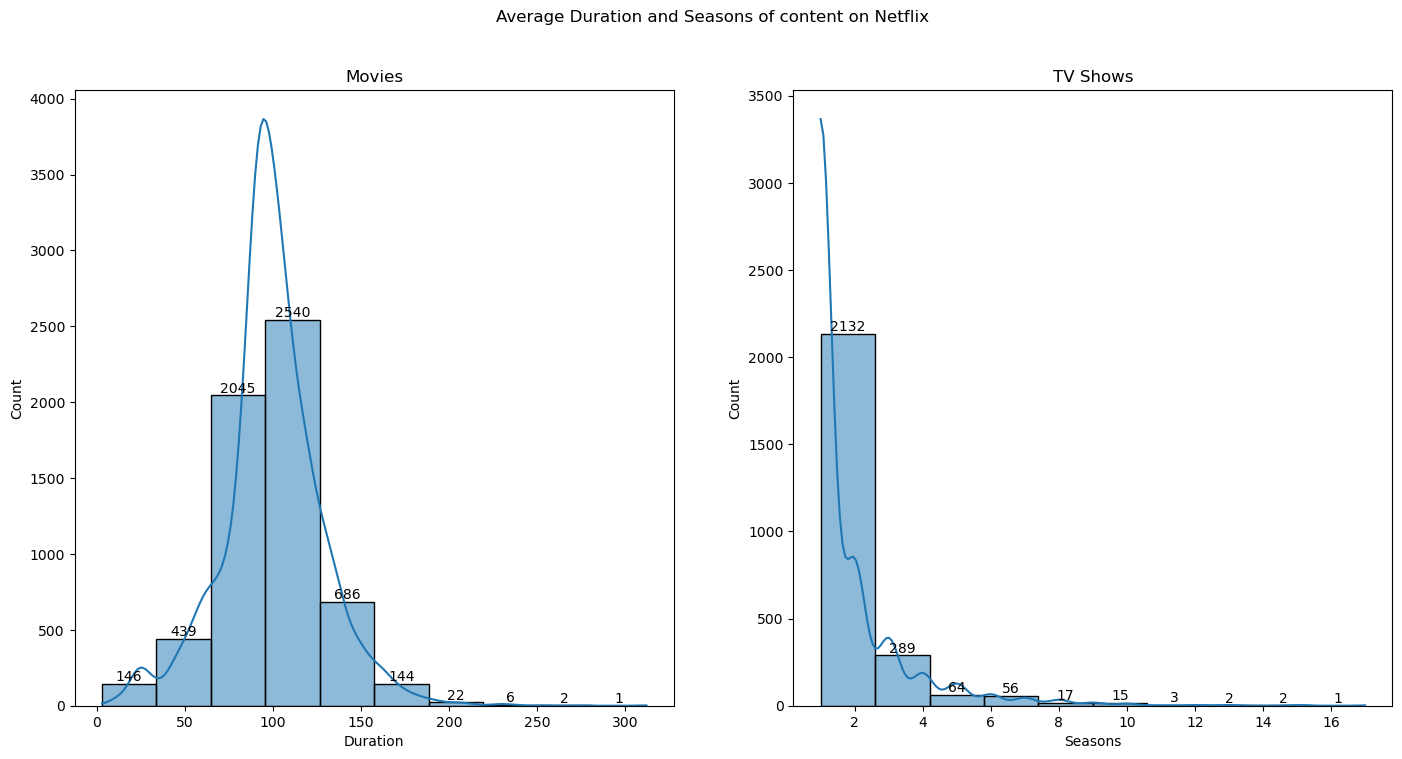

In [56]:
df_movies_temp=df_movies.drop_duplicates(subset=['duration','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['seasons','title'])
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.suptitle('Average Duration and Seasons of content on Netflix')

plt.subplot(1,2,1)
label=sns.histplot(df_movies_temp['duration'].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
    
plt.xlabel('Duration')
plt.title('Movies')

plt.subplot(1,2,2)
label=sns.histplot(df_tvs_temp['seasons'].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')

plt.show()

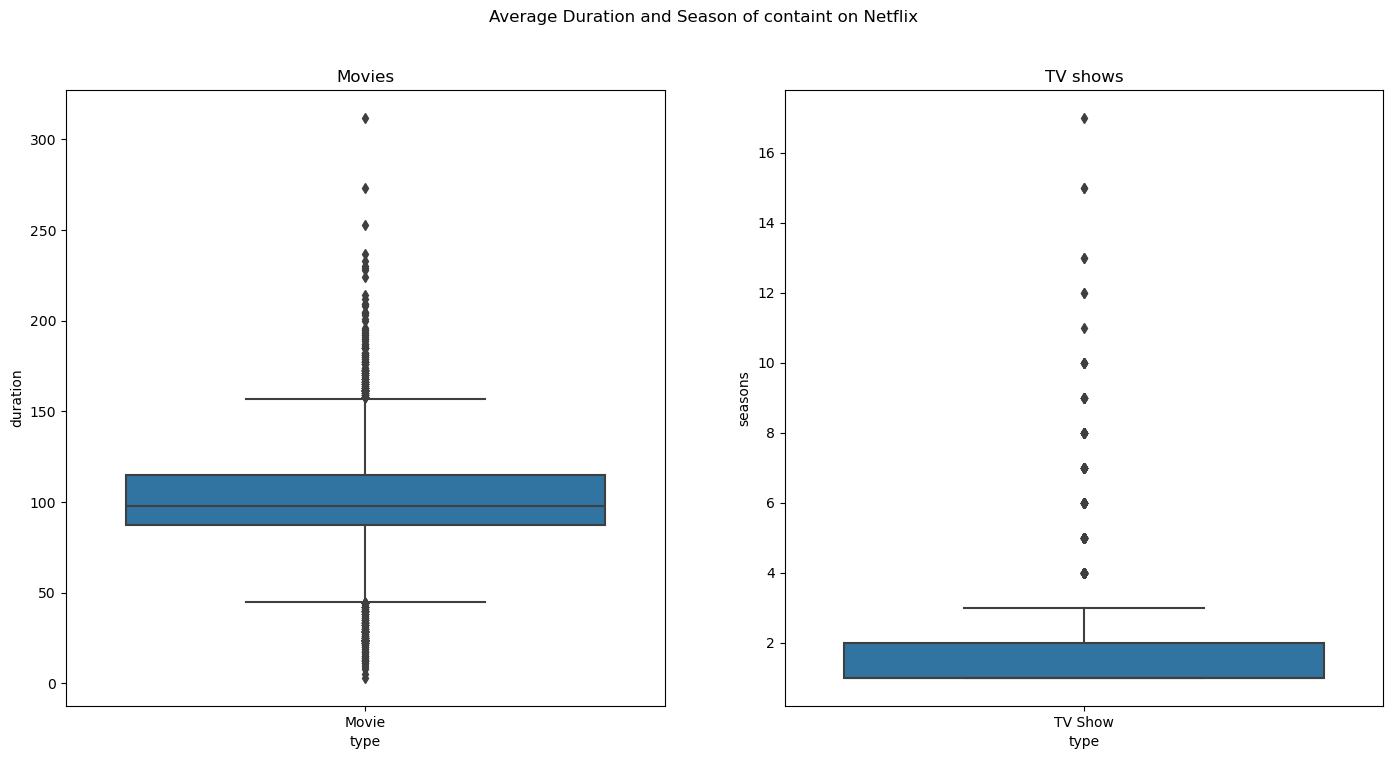

In [57]:
df_movies_temp['duration']=df_movies_temp['duration'].astype(int)
df_tvs_temp['seasons']=df_tvs_temp['seasons'].astype(int)

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Season of containt on Netflix')

plt.subplot(1,2,1)
sns.boxplot(df_movies_temp,x='type', y='duration')
plt.title('Movies')

plt.subplot(1,2,2)
sns.boxplot(df_tvs_temp,x='type', y='seasons')
plt.title('TV shows')
plt.show()

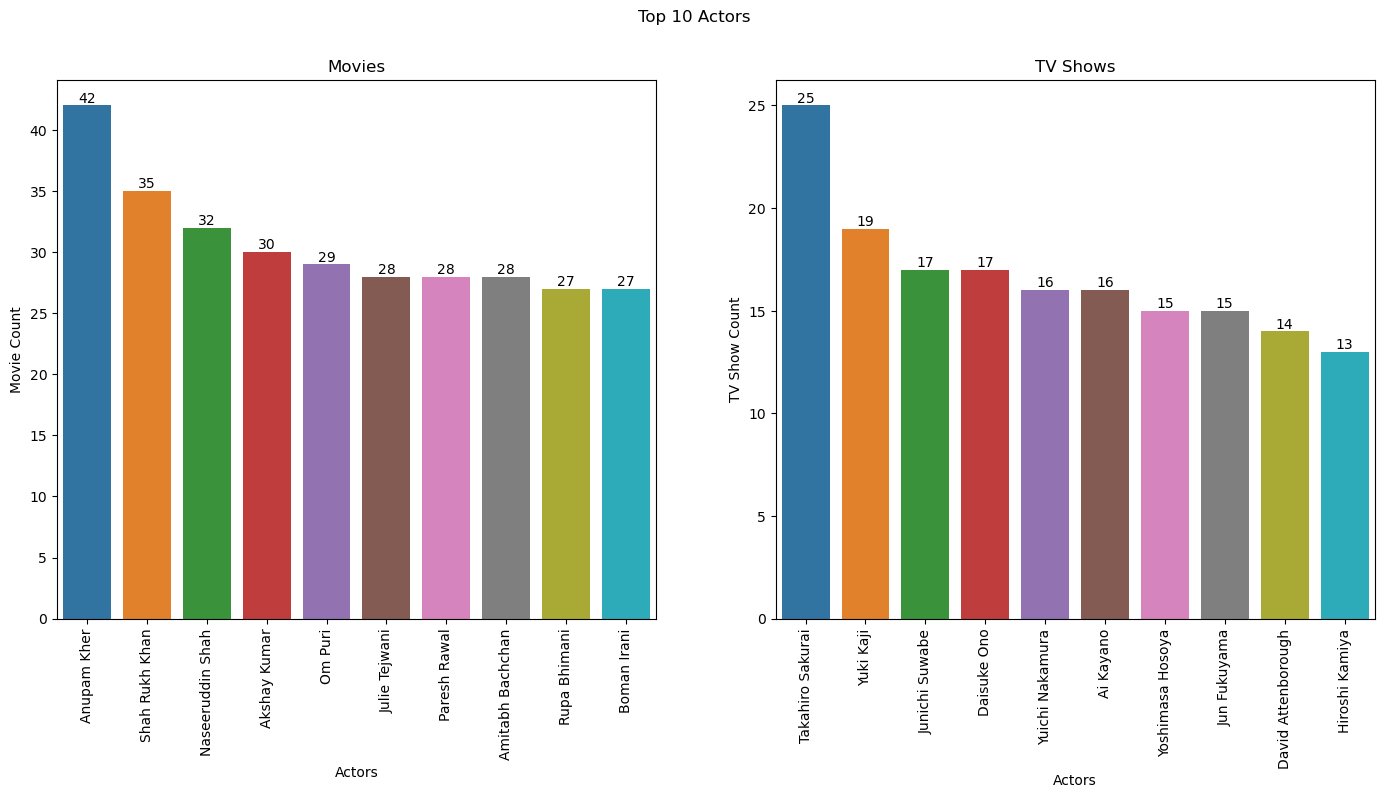

<Figure size 640x480 with 0 Axes>

In [58]:
df_movies_temp=df_movies.drop_duplicates(subset=['cast','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['cast','title'])

plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Actors')

plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp, x='cast', order=df_movies_temp['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=90)
plt.xlabel("Actors")
plt.ylabel("Movie Count")


plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp, x='cast', order=df_tvs_temp['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=90)
plt.xlabel("Actors")
plt.ylabel("TV Show Count")

plt.show()
plt.savefig("6.png")

In [59]:
#pip install wordCloud

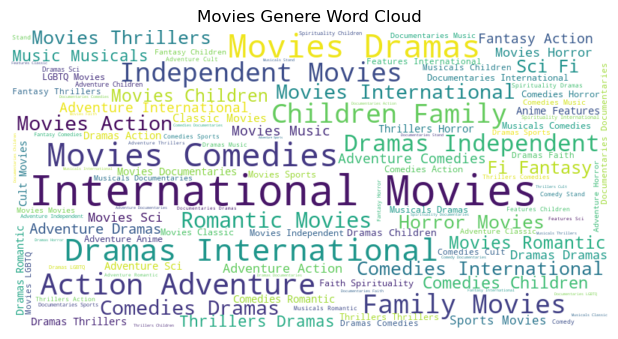

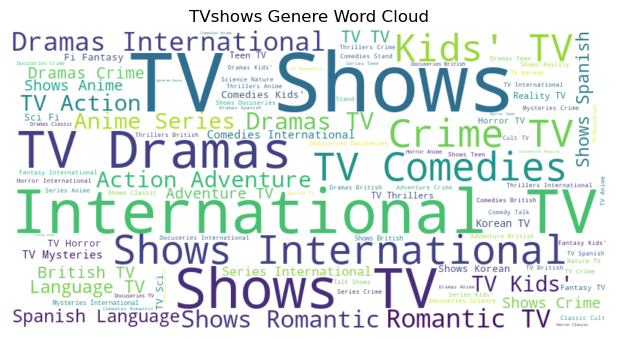

In [60]:
from wordcloud import WordCloud

genre_text=' '.join(df_movies['genre'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(genre_text)
plt.figure(figsize=(17,10))

plt.subplot(1,2,1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Movies Genere Word Cloud')

genre_text=' '.join(df_tvs['genre'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(genre_text)
plt.figure(figsize=(17,10))

plt.subplot(1,2,2)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('TVshows Genere Word Cloud')

plt.show()

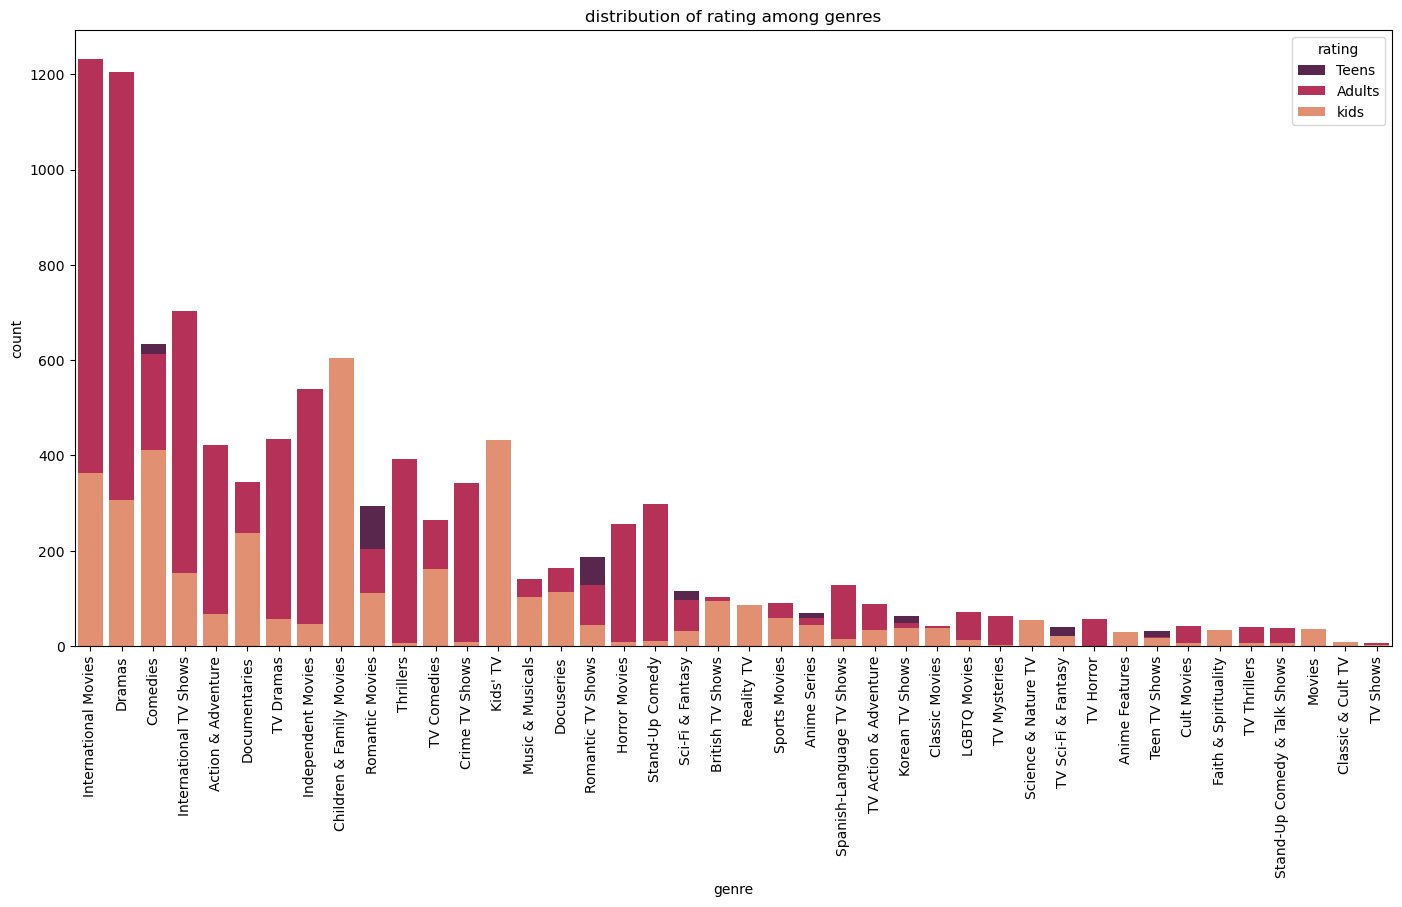

In [61]:
df_temp=df_new.drop_duplicates(subset=['genre','title'])
plt.figure(figsize=(17,8))
plt.title('distribution of rating among genres')
sns.countplot(data=df_temp,x='genre',hue='rating',dodge=False,order=df_temp['genre'].value_counts().index,palette='rocket')
plt.xticks(rotation=90)
plt.show()

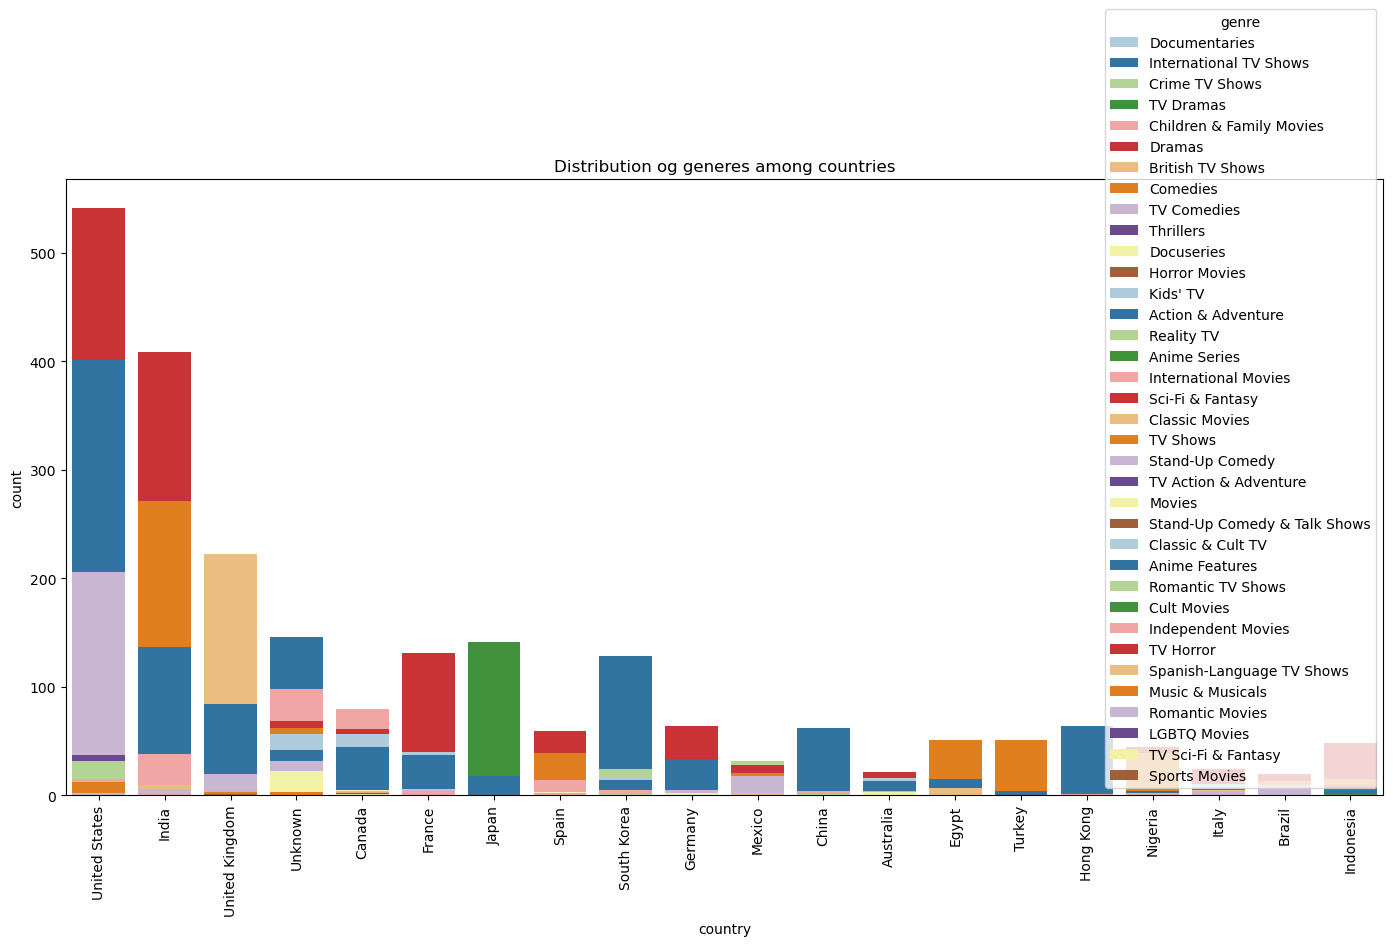

In [62]:
df_temp=df_new.drop_duplicates(subset=['country','title'])
plt.figure(figsize=(17,8))
plt.title('Distribution og generes among countries')
sns.countplot(data=df_temp,x='country',hue='genre',dodge=False,order=df_temp['country'].value_counts().head(20).index,palette='Paired')
plt.xticks(rotation=90)
plt.show()

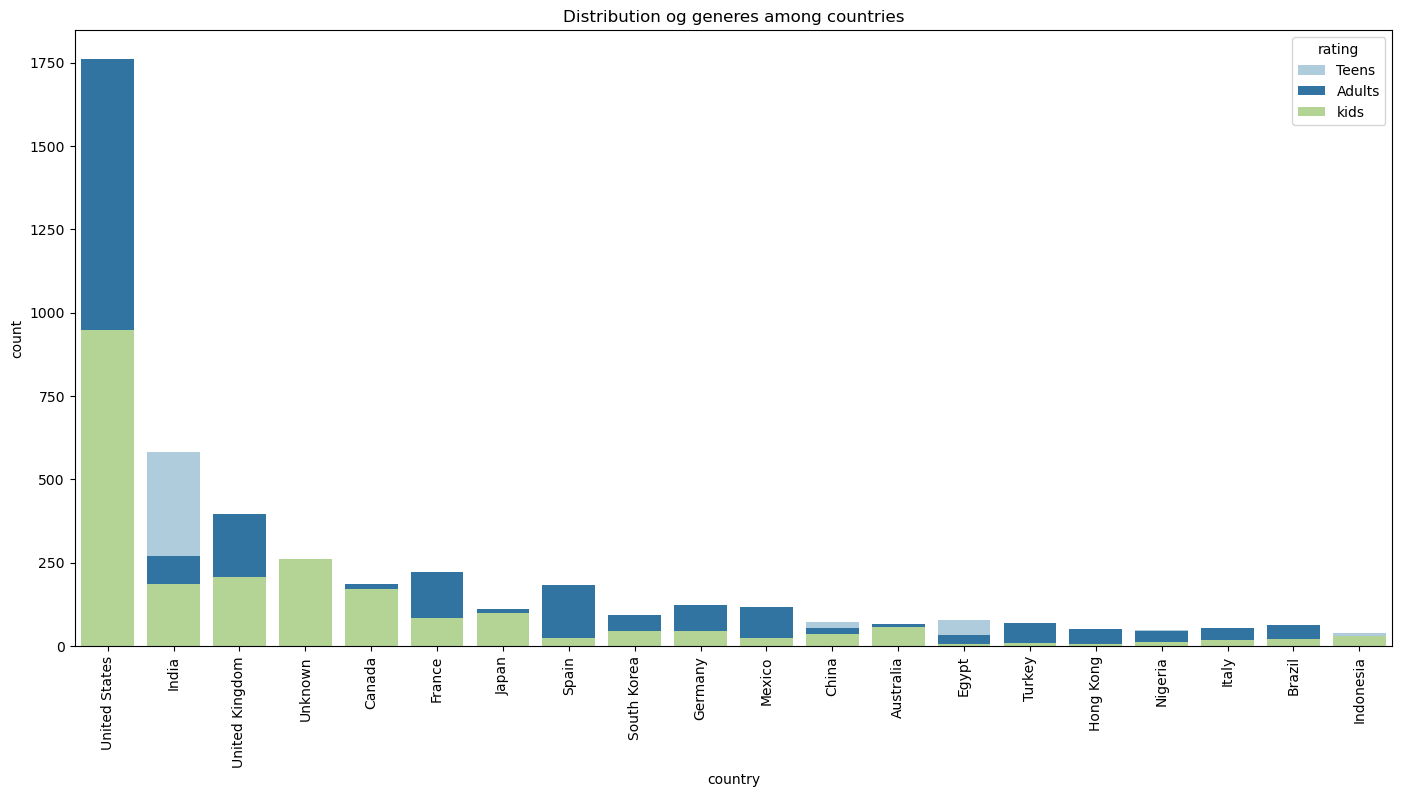

In [63]:
df_temp=df_new.drop_duplicates(subset=['country','title'])
plt.figure(figsize=(17,8))
plt.title('Distribution og generes among countries')
sns.countplot(data=df_temp,x='country',hue='rating',dodge=False,order=df_temp['country'].value_counts().head(20).index,palette='Paired')
plt.xticks(rotation=90)
plt.show()